参考资料：

https://www.kesci.com/home/project/5c6a0cd35136ba002b52e6fa


https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html




In [1]:
import pandas as pd

df = pd.read_csv('./heros.csv', encoding='gb18030')
df.head()

,英雄,最大生命,生命成长,初始生命,最大法力,法力成长,初始法力,最高物攻,物攻成长,初始物攻,...,最大每5秒回血,每5秒回血成长,初始每5秒回血,最大每5秒回蓝,每5秒回蓝成长,初始每5秒回蓝,最大攻速,攻击范围,主要定位,次要定位
0,夏侯惇,7350,288.8,3307,1746,94,430,321,11.570,159,...,98,3.357,51,37,1.571,15,28.00%,近战,坦克,战士
1,钟无艳,7000,275.0,3150,1760,95,430,318,11.000,164,...,92,3.143,48,37,1.571,15,14.00%,近战,战士,坦克
2,张飞,8341,329.4,3450,100,0,100,301,10.570,153,...,115,4.143,57,5,0.000,5,14.00%,近战,坦克,辅助
3,牛魔,8476,352.8,3537,1926,104,470,273,8.357,156,...,117,4.214,58,42,1.786,17,14.00%,近战,坦克,辅助
4,吕布,7344,270.0,3564,0,0,0,343,12.360,170,...,97,3.071,54,0,0.000,0,14.00%,近战,战士,坦克


In [2]:
df.columns.values

array(['英雄', '最大生命', '生命成长', '初始生命', '最大法力', '法力成长', '初始法力', '最高物攻',
       '物攻成长', '初始物攻', '最大物防', '物防成长', '初始物防', '最大每5秒回血', '每5秒回血成长',
       '初始每5秒回血', '最大每5秒回蓝', '每5秒回蓝成长', '初始每5秒回蓝', '最大攻速', '攻击范围', '主要定位',
       '次要定位 '], dtype=object)

In [3]:
her0 = df['英雄']
her0

0      夏侯惇
1      钟无艳
2       张飞
3       牛魔
4       吕布
5       亚瑟
6       芈月
7      程咬金
8       廉颇
9     东皇太一
10      庄周
11    太乙真人
12      白起
13     雅典娜
14      刘邦
15      刘禅
16      墨子
17      项羽
18      关羽
19      后羿
20    马可波罗
21    鲁班七号
22     李元芳
23     孙尚香
24      黄忠
25     狄仁杰
26      虞姬
27    成吉思汗
28      嬴政
29     武则天
      ... 
39      孙膑
40     安琪拉
41      小乔
42      周瑜
43      张良
44     高渐离
45      扁鹊
46      钟馗
47      大乔
48     鬼谷子
49     蔡文姬
50     花木兰
51      赵云
52     橘石京
53      李白
54      韩信
55      杨戬
56      达摩
57     孙悟空
58      刘备
59      曹操
60      典韦
61    宫本武藏
62     老夫子
63      哪吒
64      阿轲
65    娜可露露
66     兰陵王
67       铠
68    百里守约
Name: 英雄, Length: 69, dtype: object

## 绘制相关系数矩阵

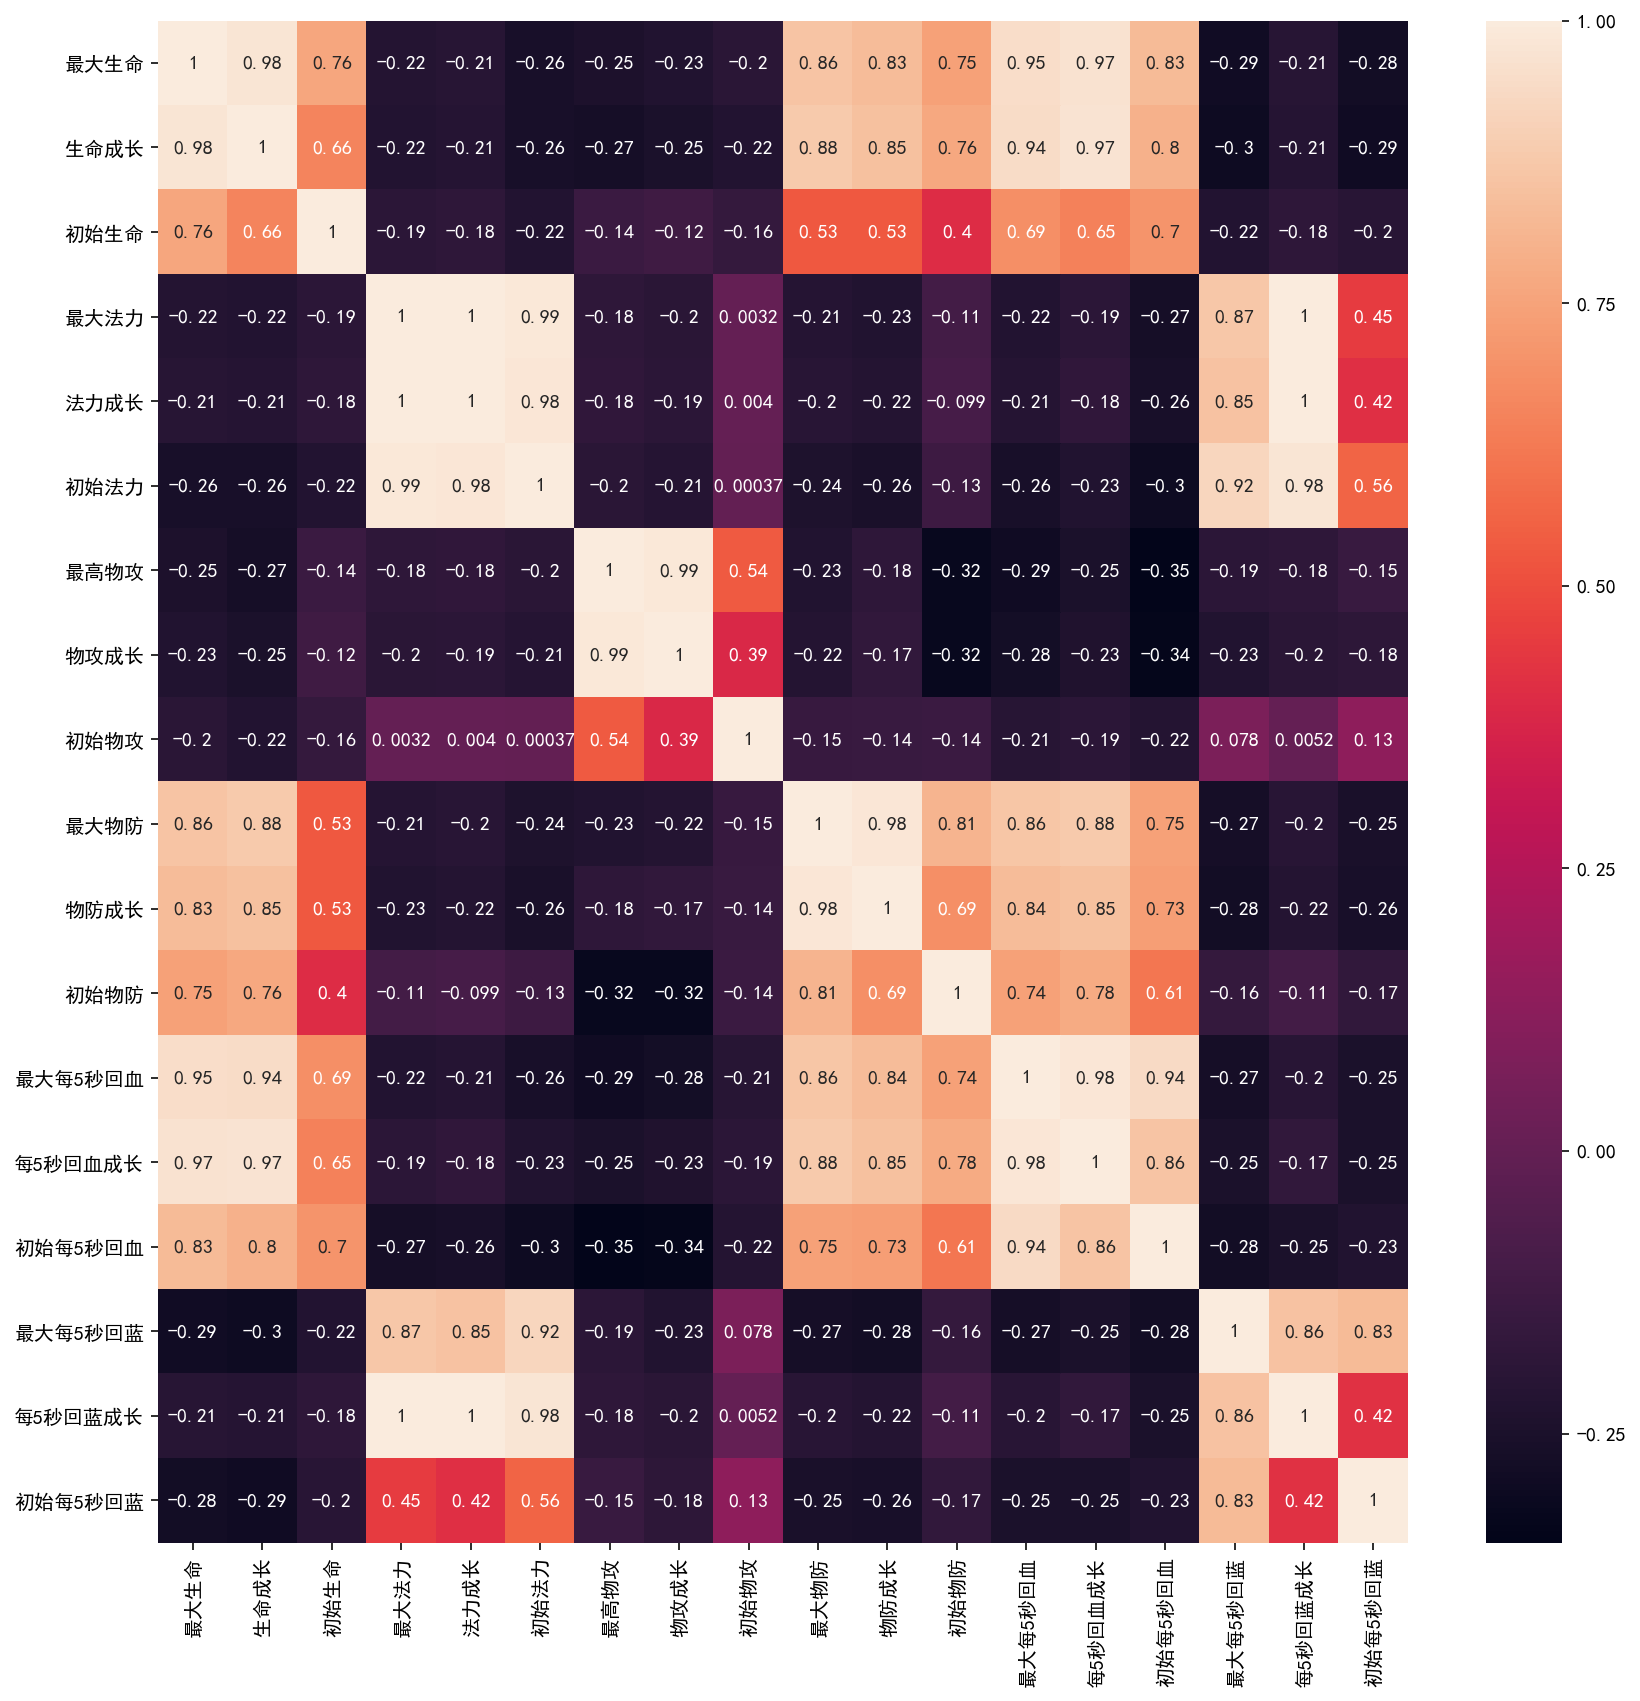

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True)
plt.show()

### 进行特征选择，通过特征选择进行降维，其选择的标准是通过相关性判断共线性从而进行筛选

In [5]:
features_remain = [
    '最大生命', '初始生命', '最大法力', '最高物攻', '初始物攻', '初始物攻', '最大物防', '初始物防', '最大每5秒回血',
    '最大每5秒回蓝', '初始每5秒回蓝', '最大攻速', '攻击范围'
]

In [6]:
data = df[features_remain]

In [7]:
data.head()

,最大生命,初始生命,最大法力,最高物攻,初始物攻,初始物攻,最大物防,初始物防,最大每5秒回血,最大每5秒回蓝,初始每5秒回蓝,最大攻速,攻击范围
0,7350,3307,1746,321,159,159,397,101,98,37,15,28.00%,近战
1,7000,3150,1760,318,164,164,409,100,92,37,15,14.00%,近战
2,8341,3450,100,301,153,153,504,125,115,5,5,14.00%,近战
3,8476,3537,1926,273,156,156,394,109,117,42,17,14.00%,近战
4,7344,3564,0,343,170,170,390,99,97,0,0,14.00%,近战


In [8]:
data['最大攻速'].dtype

dtype('O')

转换成数值类型。

In [9]:
data['最大攻速']

0     28.00%
1     14.00%
2     14.00%
3     14.00%
4     14.00%
5     14.00%
6      0.00%
7     28.00%
8     14.00%
9     14.00%
10    14.00%
11    14.00%
12    14.00%
13    28.00%
14    42.00%
15    14.00%
16    28.00%
17    14.00%
18     7.00%
19    42.00%
20    28.00%
21    42.00%
22    28.00%
23    42.00%
24    42.00%
25    42.00%
26    42.00%
27    42.00%
28     0.00%
29    14.00%
       ...  
39    14.00%
40    14.00%
41    14.00%
42    14.00%
43    14.00%
44    14.00%
45    14.00%
46    14.00%
47    14.00%
48    14.00%
49    14.00%
50    28.00%
51    28.00%
52    14.00%
53    42.00%
54    42.00%
55    28.00%
56    42.00%
57    14.00%
58    28.00%
59    14.00%
60    42.00%
61    14.00%
62    56.00%
63    28.00%
64    28.00%
65    14.00%
66    14.00%
67    28.00%
68    28.00%
Name: 最大攻速, Length: 69, dtype: object

In [10]:
data.loc[:, '最大攻速'] = data['最大攻速'].map(lambda x: float(x.strip('%')) / 100)

/Users/liwei/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
data['最大攻速']

0     0.28
1     0.14
2     0.14
3     0.14
4     0.14
5     0.14
6     0.00
7     0.28
8     0.14
9     0.14
10    0.14
11    0.14
12    0.14
13    0.28
14    0.42
15    0.14
16    0.28
17    0.14
18    0.07
19    0.42
20    0.28
21    0.42
22    0.28
23    0.42
24    0.42
25    0.42
26    0.42
27    0.42
28    0.00
29    0.14
      ... 
39    0.14
40    0.14
41    0.14
42    0.14
43    0.14
44    0.14
45    0.14
46    0.14
47    0.14
48    0.14
49    0.14
50    0.28
51    0.28
52    0.14
53    0.42
54    0.42
55    0.28
56    0.42
57    0.14
58    0.28
59    0.14
60    0.42
61    0.14
62    0.56
63    0.28
64    0.28
65    0.14
66    0.14
67    0.28
68    0.28
Name: 最大攻速, Length: 69, dtype: float64

In [12]:
data['最大攻速'].dtype

dtype('float64')

In [13]:
data.loc[data.index, '攻击范围'] = data['攻击范围'].map({'远程': 1, '近战': 0})

/Users/liwei/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
data['攻击范围']

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
     ..
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    0
47    0
48    0
49    1
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    1
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    1
Name: 攻击范围, Length: 69, dtype: int64

## 开始聚类

### 数据标准化

In [15]:
data.head()

,最大生命,初始生命,最大法力,最高物攻,初始物攻,初始物攻,最大物防,初始物防,最大每5秒回血,最大每5秒回蓝,初始每5秒回蓝,最大攻速,攻击范围
0,7350,3307,1746,321,159,159,397,101,98,37,15,0.28,0
1,7000,3150,1760,318,164,164,409,100,92,37,15,0.14,0
2,8341,3450,100,301,153,153,504,125,115,5,5,0.14,0
3,8476,3537,1926,273,156,156,394,109,117,42,17,0.14,0
4,7344,3564,0,343,170,170,390,99,97,0,0,0.14,0


In [16]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
datas = scale.fit_transform(data)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/liwei/.local/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [17]:
datas

array([[ 7.66558027e-01,  4.67638599e-01,  3.73082908e-01,
        -2.15283784e-01, -9.77823954e-01, -9.77823954e-01,
         3.80189813e-01,  1.97494541e-01,  7.02743141e-01,
         2.78391336e-01,  6.53670864e-02,  4.94212931e-01,
        -8.26393871e-01],
       [ 4.17906006e-01, -3.64205234e-01,  3.92362751e-01,
        -2.87981570e-01, -3.05813468e-01, -3.05813468e-01,
         6.02504195e-01,  1.23834415e-01,  3.50946696e-01,
         2.78391336e-01,  6.53670864e-02, -6.61742739e-01,
        -8.26393871e-01],
       [ 1.75374132e+00,  1.22530527e+00, -1.89367568e+00,
        -6.99935695e-01, -1.78423654e+00, -1.78423654e+00,
         2.36249305e+00,  1.96533756e+00,  1.69949974e+00,
        -1.82670480e+00, -1.09112752e+00, -6.61742739e-01,
        -8.26393871e-01],
       [ 1.88822139e+00,  1.68626332e+00,  6.20966593e-01,
        -1.37844837e+00, -1.38103025e+00, -1.38103025e+00,
         3.24611217e-01,  7.86775548e-01,  1.81676522e+00,
         6.07312607e-01,  2.96666008e

In [18]:
from sklearn.mixture import GaussianMixture

Gmm = GaussianMixture(n_components=30, covariance_type='full')
Gmm.fit(datas)
predict = Gmm.predict(datas)

In [19]:
predict

array([ 2, 23, 28, 27,  0,  0,  9, 10, 29, 23,  5, 23, 27, 11,  7,  5, 21,
        7,  0, 22,  6,  3, 22,  3,  3,  3, 22, 16, 26, 19, 11, 19, 19,  1,
       19, 19, 26, 18, 12, 15, 15, 26, 26, 19,  1, 15, 23, 12, 23,  1, 25,
        4, 14, 24, 24,  2, 13, 23, 20,  0, 13, 14, 17,  2,  8,  4,  4, 13,
       16])

In [20]:
result = pd.DataFrame(predict)

In [21]:
result.shape

(69, 1)

In [22]:
results = pd.concat([data, result], axis=1)

In [23]:
results

,最大生命,初始生命,最大法力,最高物攻,初始物攻,初始物攻,最大物防,初始物防,最大每5秒回血,最大每5秒回蓝,初始每5秒回蓝,最大攻速,攻击范围,0
0,7350,3307,1746,321,159,159,397,101,98,37,15,0.28,0,2
1,7000,3150,1760,318,164,164,409,100,92,37,15,0.14,0,23
2,8341,3450,100,301,153,153,504,125,115,5,5,0.14,0,28
3,8476,3537,1926,273,156,156,394,109,117,42,17,0.14,0,27
4,7344,3564,0,343,170,170,390,99,97,0,0,0.14,0,0
5,8050,3622,0,346,164,164,400,98,106,0,0,0.14,0,0
6,6164,3105,100,289,152,152,361,88,77,0,0,0.00,1,9
7,8611,3437,0,316,161,161,504,125,119,0,0,0.28,0,10
8,9328,3558,1708,286,163,163,514,132,128,36,15,0.14,0,29
9,7669,3201,1926,286,163,163,360,99,106,42,17,0.14,0,23


In [24]:
resuld = pd.concat([results, her0], axis=1)
resuld

,最大生命,初始生命,最大法力,最高物攻,初始物攻,初始物攻,最大物防,初始物防,最大每5秒回血,最大每5秒回蓝,初始每5秒回蓝,最大攻速,攻击范围,0,英雄
0,7350,3307,1746,321,159,159,397,101,98,37,15,0.28,0,2,夏侯惇
1,7000,3150,1760,318,164,164,409,100,92,37,15,0.14,0,23,钟无艳
2,8341,3450,100,301,153,153,504,125,115,5,5,0.14,0,28,张飞
3,8476,3537,1926,273,156,156,394,109,117,42,17,0.14,0,27,牛魔
4,7344,3564,0,343,170,170,390,99,97,0,0,0.14,0,0,吕布
5,8050,3622,0,346,164,164,400,98,106,0,0,0.14,0,0,亚瑟
6,6164,3105,100,289,152,152,361,88,77,0,0,0.00,1,9,芈月
7,8611,3437,0,316,161,161,504,125,119,0,0,0.28,0,10,程咬金
8,9328,3558,1708,286,163,163,514,132,128,36,15,0.14,0,29,廉颇
9,7669,3201,1926,286,163,163,360,99,106,42,17,0.14,0,23,东皇太一


In [25]:
resuld.rename({0: '聚类'}, axis=1, inplace=True)
resuld.head(5)

,最大生命,初始生命,最大法力,最高物攻,初始物攻,初始物攻,最大物防,初始物防,最大每5秒回血,最大每5秒回蓝,初始每5秒回蓝,最大攻速,攻击范围,聚类,英雄
0,7350,3307,1746,321,159,159,397,101,98,37,15,0.28,0,2,夏侯惇
1,7000,3150,1760,318,164,164,409,100,92,37,15,0.14,0,23,钟无艳
2,8341,3450,100,301,153,153,504,125,115,5,5,0.14,0,28,张飞
3,8476,3537,1926,273,156,156,394,109,117,42,17,0.14,0,27,牛魔
4,7344,3564,0,343,170,170,390,99,97,0,0,0.14,0,0,吕布


In [26]:
resuld[resuld['聚类'] == 3]

,最大生命,初始生命,最大法力,最高物攻,初始物攻,初始物攻,最大物防,初始物防,最大每5秒回血,最大每5秒回蓝,初始每5秒回蓝,最大攻速,攻击范围,聚类,英雄
21,5989,3401,1756,400,174,174,323,88,69,36,15,0.42,1,3,鲁班七号
23,6014,3235,1756,411,172,172,346,89,69,36,15,0.42,1,3,孙尚香
24,5898,3173,1784,403,172,172,319,91,68,38,16,0.42,1,3,黄忠
25,5710,3242,1770,376,169,169,338,95,66,37,15,0.42,1,3,狄仁杰


的确，她们很像一类。

完成聚类结果，接下来进行精确度验证，这个最好得出的数值越大越好，证明了类间的差异越大，类内的差异越小。

In [27]:
from sklearn.metrics import calinski_harabaz_score

calinski_harabaz_score(datas, predict)

19.215674332384516

### 再进行一次聚类

In [28]:
from sklearn.mixture import GaussianMixture

Gm = GaussianMixture(n_components=3, covariance_type='full')
Gm.fit(datas)
predicts = Gmm.predict(datas)
calinski_harabaz_score(datas, predicts)

19.215674332384516

### 用K-Means 进行聚类

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [30]:
# 数据规范化
min_max = MinMaxScaler()
datas = min_max.fit_transform(data)
k = KMeans(n_clusters=3)
k.fit(datas)
pre = k.predict(datas)
calinski_harabaz_score(datas, pre)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


40.42197134044455

K 均值算法的聚类准确性明显高过 EM 。